
Reduce dimensions of the Iris dataset using PCA. Visualize the data in 2D using matplotlib.

In [1]:
import numpy as np # linear algebra
import pandas as pd 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os

In [4]:
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


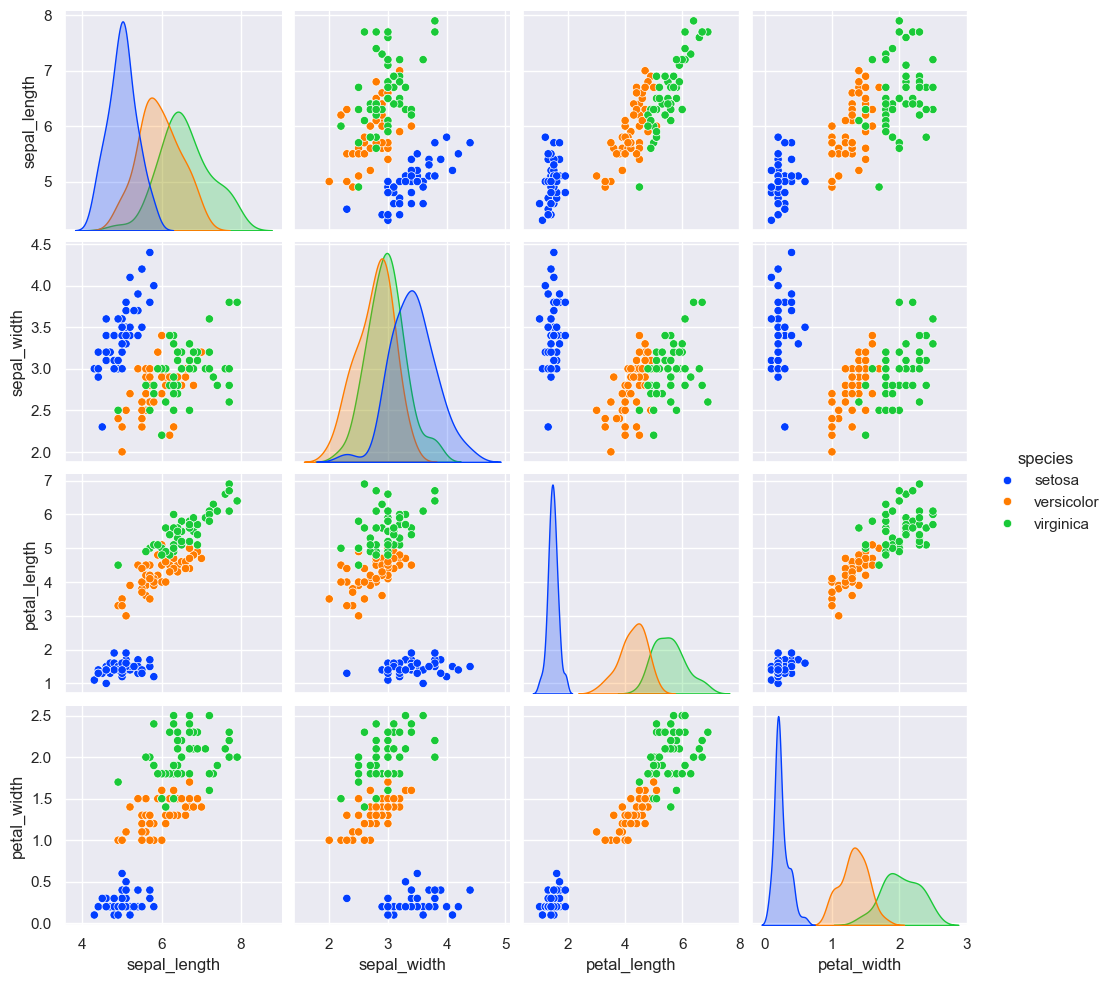

In [8]:
import seaborn as sns
sns.pairplot(df, hue="species", palette='bright');

In [10]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Standardize the Data

In [11]:
features_iris = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x_iris = df.loc[:, features_iris].values

In [14]:
y_iris = df.loc[:, ['species']].values

In [16]:
from sklearn.preprocessing import StandardScaler
x_iris = StandardScaler().fit_transform(x_iris)


In [19]:
df_iris_standarize = pd.DataFrame(data = x_iris, columns = features_iris)
df_iris_standarize['species'] = df['species']
df_iris_standarize.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa
5,-0.537178,1.939791,-1.169714,-1.052180,setosa
6,-1.506521,0.788808,-1.340227,-1.183812,setosa
7,-1.021849,0.788808,-1.283389,-1.315444,setosa
8,-1.748856,-0.362176,-1.340227,-1.315444,setosa
9,-1.143017,0.098217,-1.283389,-1.447076,setosa


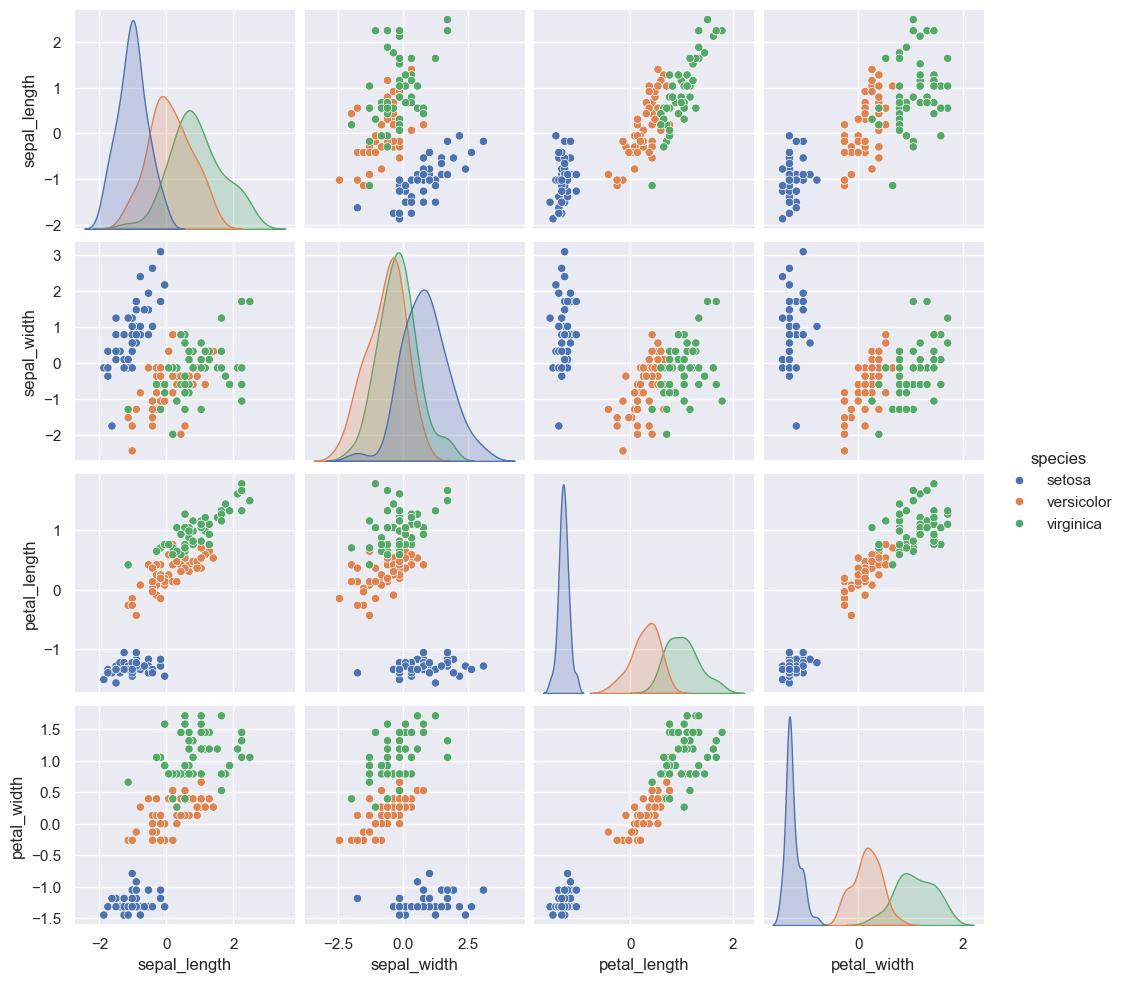

In [20]:

sns.pairplot(df_iris_standarize, hue='species')

PCA Projection to 2D    

In [22]:
from sklearn.decomposition import PCA
pca_iris = PCA(n_components=2)

In [24]:
principalComponents_iris = pca_iris.fit_transform(x_iris)

In [25]:
principalDf_iris = pd.DataFrame(data = principalComponents_iris ,columns = ['principal component 1', 'principal component 2'])

In [26]:

finalDf_iris = pd.concat([principalDf_iris, df[['species']]], axis = 1)
finalDf_iris.head(15)

,principal component 1,principal component 2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
5,-2.075631,1.489178,setosa
6,-2.444029,0.047644,setosa
7,-2.232847,0.223148,setosa
8,-2.334640,-1.115328,setosa
9,-2.184328,-0.469014,setosa


Visualize 2D Projection

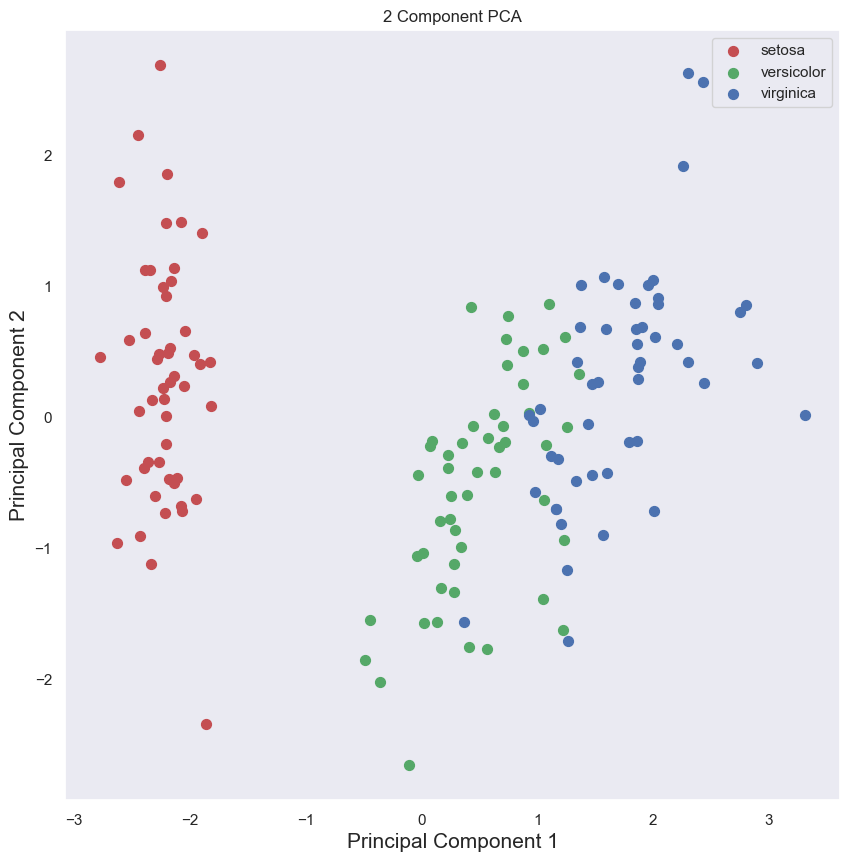

In [36]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 12)


iris_targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for species, color in zip(iris_targets,colors):
    indicesToKeep = finalDf_iris['species'] == species
    ax.scatter(finalDf_iris.loc[indicesToKeep, 'principal component 1']
               , finalDf_iris.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(iris_targets)
ax.grid()